In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('Sales_Export_2019_2020.csv')

# 1. Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# 2. Convert 'order_value_EUR' from string (with commas) to float
df['order_value_EUR'] = df['order_value_EUR'].str.replace(',', '').astype(float)

# 3. Convert 'date' to datetime objects
df['date'] = pd.to_datetime(df['date'])

# 4. Feature Engineering: Create a 'profit' column and 'month_year' for grouping
df['profit'] = df['order_value_EUR'] - df['cost']
df['month_year'] = df['date'].dt.to_period('M').astype(str)

print("Data cleaning complete. First 5 rows:")
print(df.head())

Data cleaning complete. First 5 rows:
    country  order_value_EUR       cost       date  category  \
0    Sweden         17524.02   14122.61 2020-02-12     Books   
1   Finland        116563.40   92807.78 2019-09-26     Games   
2  Portugal        296465.56  257480.34 2019-07-11  Clothing   
3  Portugal         74532.02   59752.32 2020-04-02    Beauty   
4     Spain        178763.42  146621.76 2019-12-22     Games   

       customer_name    sales_manager           sales_rep device_type  \
0    Goldner-Dibbert     Maxie Marrow       Madelon Bront      Mobile   
1   Hilll-Vandervort       Hube Corey         Wat Bowkley      Mobile   
2     Larkin-Collier  Celine Tumasian  Smitty Culverhouse          PC   
3  Hessel-Stiedemann  Celine Tumasian        Aurelie Wren          PC   
4     Johns and Sons     Emalia Dinse     Bertha Walbrook      Tablet   

     order_id    profit month_year  
0  70-0511466   3401.41    2020-02  
1  28-6585323  23755.62    2019-09  
2  58-7703341  38985.22    

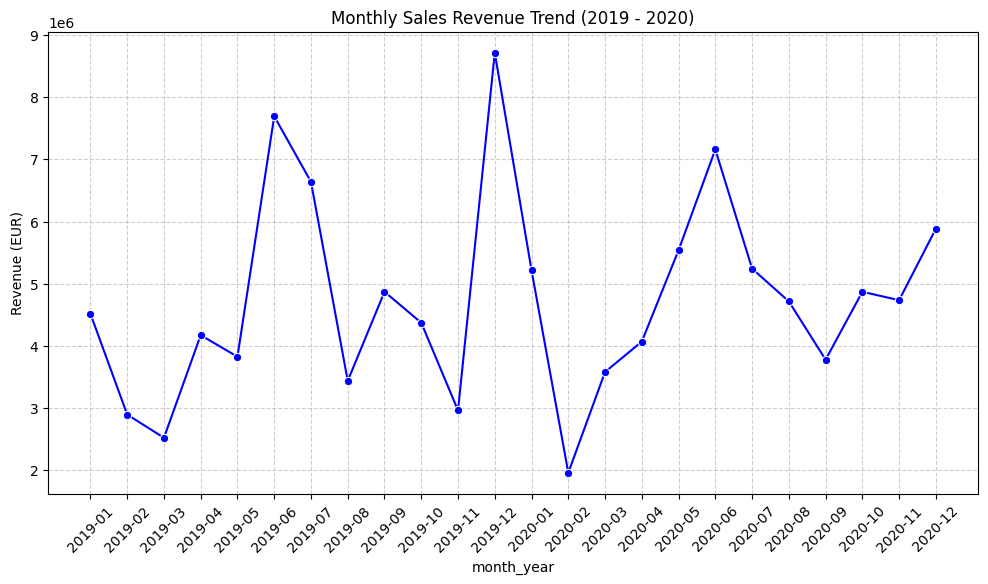

In [2]:
#Phase 2: Performance Trends (Temporal Analysis)
#Task: Identify which months performed best and check for seasonality.
# Group by month
monthly_sales = df.groupby('month_year')['order_value_EUR'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month_year', y='order_value_EUR', marker='o', color='b')
plt.title('Monthly Sales Revenue Trend (2019 - 2020)')
plt.xticks(rotation=45)
plt.ylabel('Revenue (EUR)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

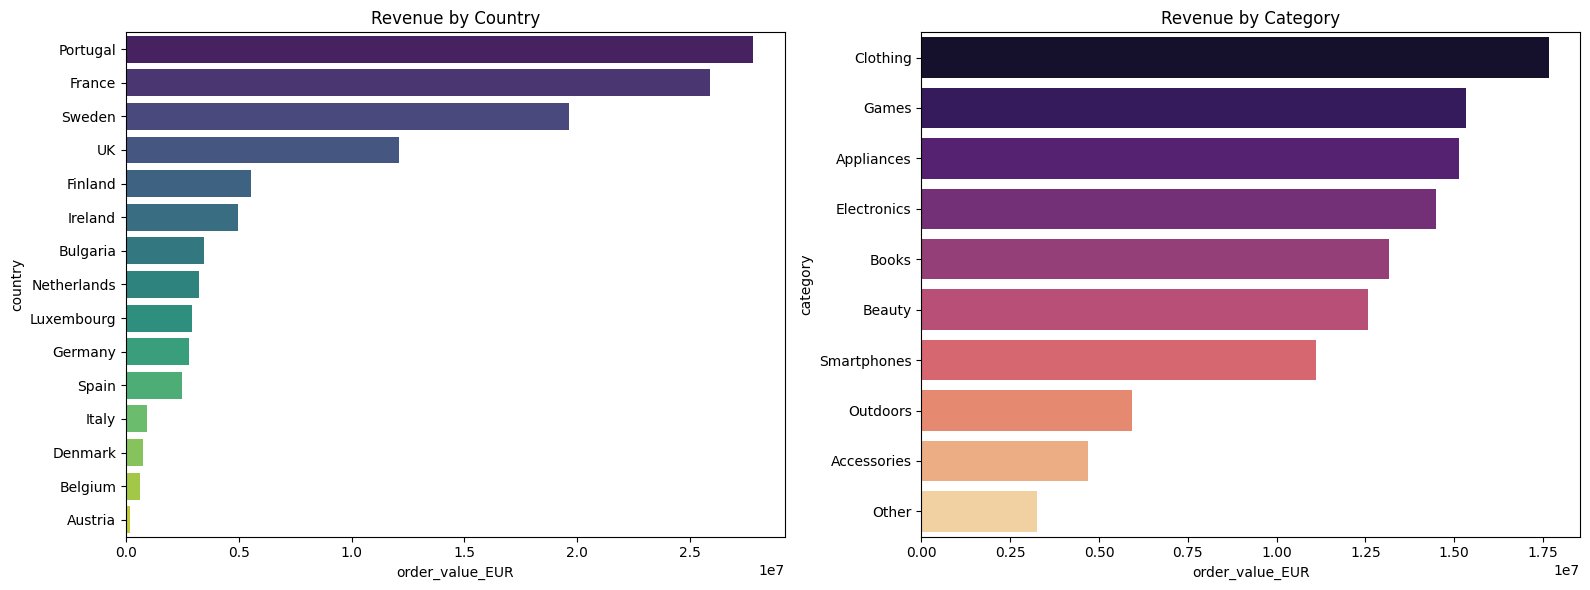

In [3]:
# Top Countries by Revenue
country_sales = df.groupby('country')['order_value_EUR'].sum().sort_values(ascending=False).reset_index()

# Top Categories by Revenue
cat_sales = df.groupby('category')['order_value_EUR'].sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Fix: Assign 'country' to hue and set legend=False
sns.barplot(data=country_sales, x='order_value_EUR', y='country', hue='country', palette='viridis', legend=False, ax=ax[0])
ax[0].set_title('Revenue by Country')

# Fix: Assign 'category' to hue and set legend=False
sns.barplot(data=cat_sales, x='order_value_EUR', y='category', hue='category', palette='magma', legend=False, ax=ax[1])
ax[1].set_title('Revenue by Category')

plt.tight_layout()
plt.show()

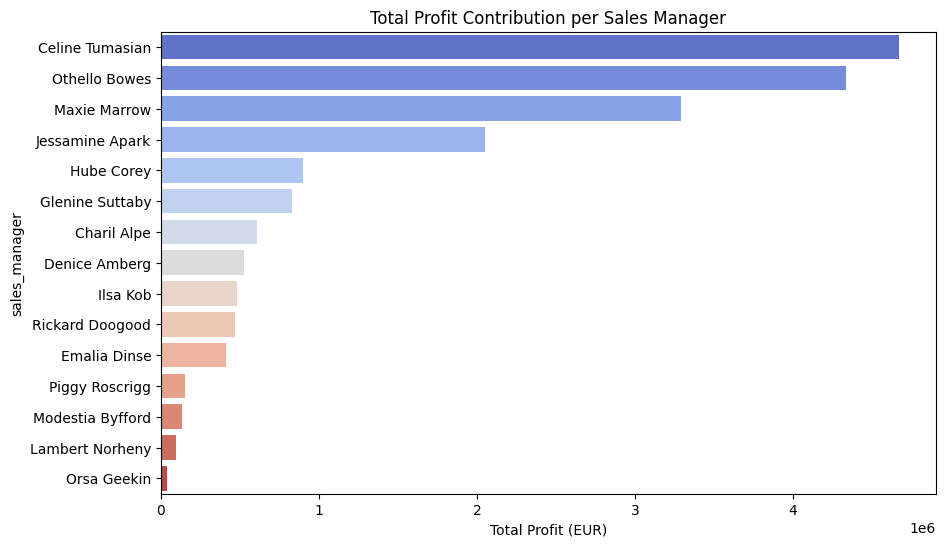

In [4]:
#Phase 4: Sales Team Efficiency
#Task: Identify the most profitable Sales Managers.

manager_perf = df.groupby('sales_manager')['profit'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
# Fix: Assign 'sales_manager' to hue and set legend=False
sns.barplot(data=manager_perf, x='profit', y='sales_manager', hue='sales_manager', palette='coolwarm', legend=False)
plt.title('Total Profit Contribution per Sales Manager')
plt.xlabel('Total Profit (EUR)')
plt.show()

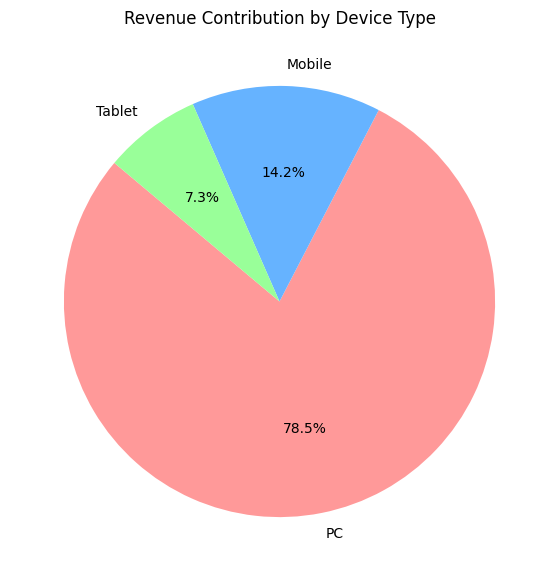

In [5]:
#Phase 5: Channel & Device Analysis
#Task: Understand how users are making purchases.
# Distribution of orders by device type
device_counts = df['device_type'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Revenue Contribution by Device Type')
plt.show()